<img src='https://raw.githubusercontent.com/Ikomia-dev/notebooks/main/examples/img/banner_ikomia.png'>




# How to make a simple workflow with Ikomia API

This tutorial is made for beginners, you will learn how to use the Ikomia API to easily prototype some Computer Vision workflows.

In a few lines of code, you can test and chain different computer vision algorithms.

## ENJOY 🥰 !!

<p float="left">
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_porsche.jpg?raw=true" width="500" />
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_porsche_res.png?raw=true" width="500" /> 
</p>

## Setup

You need to install Ikomia Python API with pip.

In [2]:
!pip install ikomia

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/home/yom/Developpement/python_venv/python3.7/bin/python -m pip install --upgrade pip' command.




---


**-Google Colab ONLY- Restart runtime**

Some Python packages have been updated. Please click on the "RESTART RUNTIME" button at the end the previous window.





---

Use your credentials to connect with Ikomia Hub and access more than 60 algorithms and 800+ models.

Your credentials are the same as you use to login to our website, if you don't have any credentials, follow this link and join our community !

https://members.ikomia.com/accounts/signup/

In [3]:
import ikomia
import os

# Easy and unsafe authentication | Only for personal use
os.environ['IKOMIA_USER'] = "your_login"
os.environ['IKOMIA_PWD'] = "your_password"

ikomia.authenticate()

Logging started at 2022-10-25 11:47:23
Ikomia auto-completion updated for Ikomia HUB algorithms.


## Create your workflow and run on your images

First, you create a new workflow from scratch. 

Then we use the YOLOv5 algorithm in order to detect objects in the image and we apply the stylization filter on every detected objects.

It will automagically download the YOLOv5 algorithm from Ikomia Hub and install all the Python dependencies (the 1st time, it can take a while, be patient ! ).

In [10]:
from ikomia.utils import ik
from ikomia.core import task
from ikomia.dataprocess import workflow
import cv2

# Create your worflow
wf = workflow.create("My first workflow") 

# Add algorithms to your workflow
yolo_id, yolo = wf.add_task(ik.infer_yolo_v5) 
stylize_id, stylize = wf.add_task(ik.ocv_stylization) 

# Connect your algorithms
wf.connect_tasks(wf.getRootID(), yolo_id)
wf.connect_tasks(yolo_id, stylize_id)

# Run
wf.run_on(url="https://cdn.pixabay.com/photo/2020/01/26/18/52/porsche-4795517_960_720.jpg") # <-- Change image url here if you want

porsche-4795517_960_720.jpg: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 155k/155k [00:00<00:00, 687kiB/s]

Fusing layers... 
Model Summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs


## Display your results

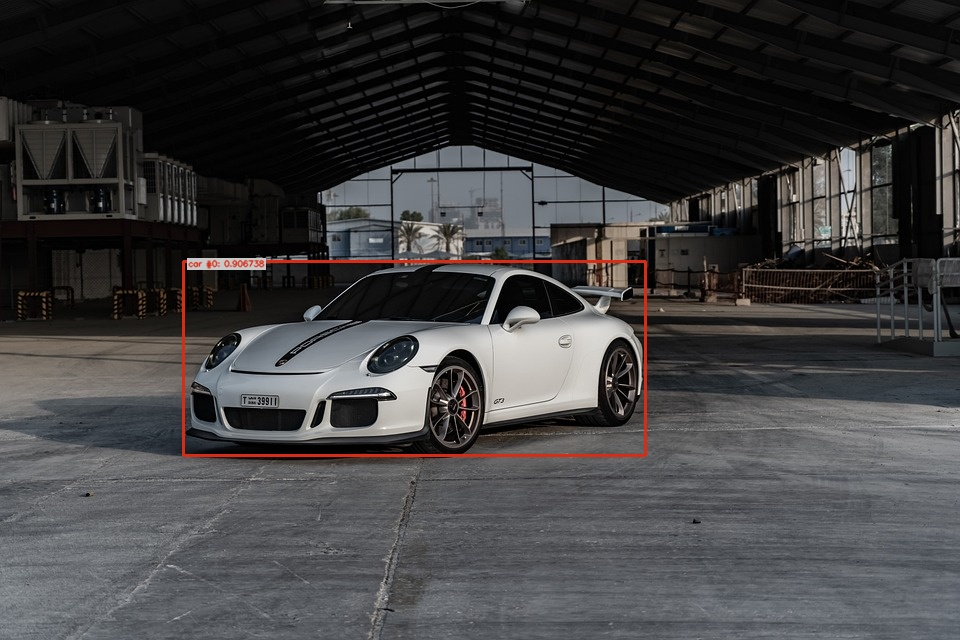

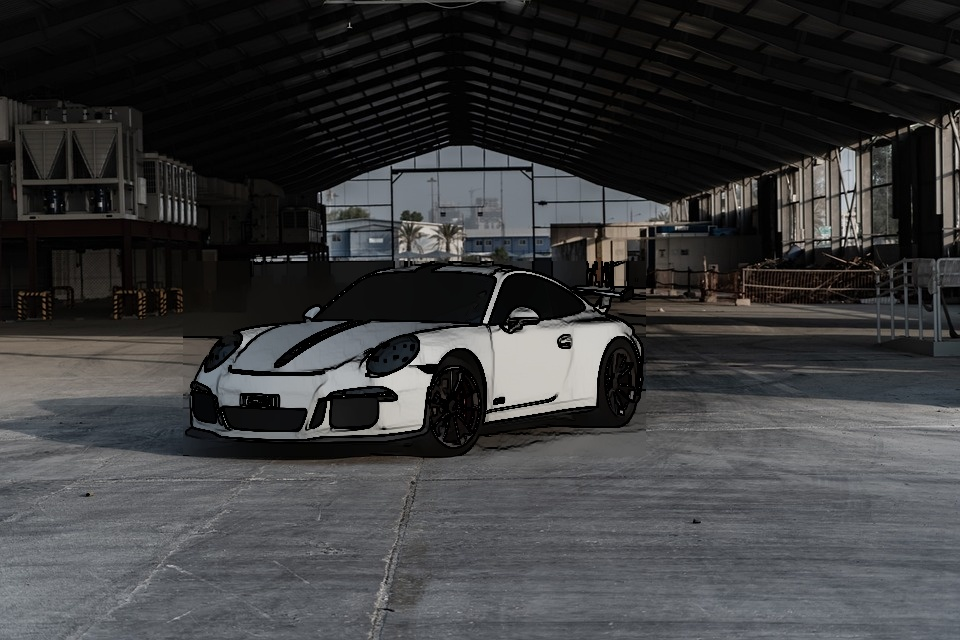

In [11]:
# Utility function for displaying image
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
# YOLO output image with bounding boxes
img_detect = wf.get_image_with_graphics(yolo_id)
# Stylization output image
img_final = wf.get_image(stylize_id, index=0)

img_detect = cv2.cvtColor(img_detect, cv2.COLOR_RGB2BGR)
img_final = cv2.cvtColor(img_final, cv2.COLOR_RGB2BGR)

imshow(img_detect)
imshow(img_final)

## More advanced workflow with manual connection and parameters setting

zebra-1170177_960_720.jpg: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 161k/161k [00:00<00:00, 6.16MiB/s]

Fusing layers... 
Model Summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs


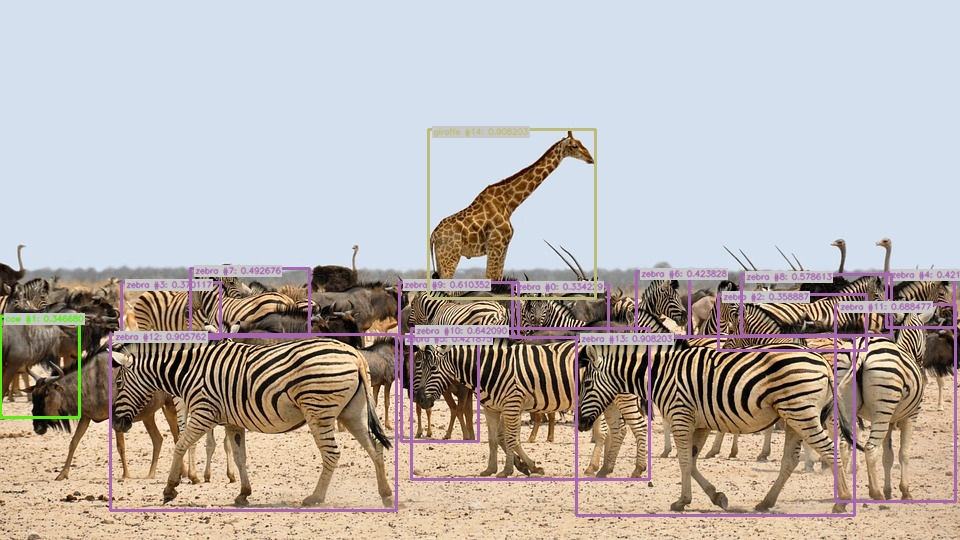

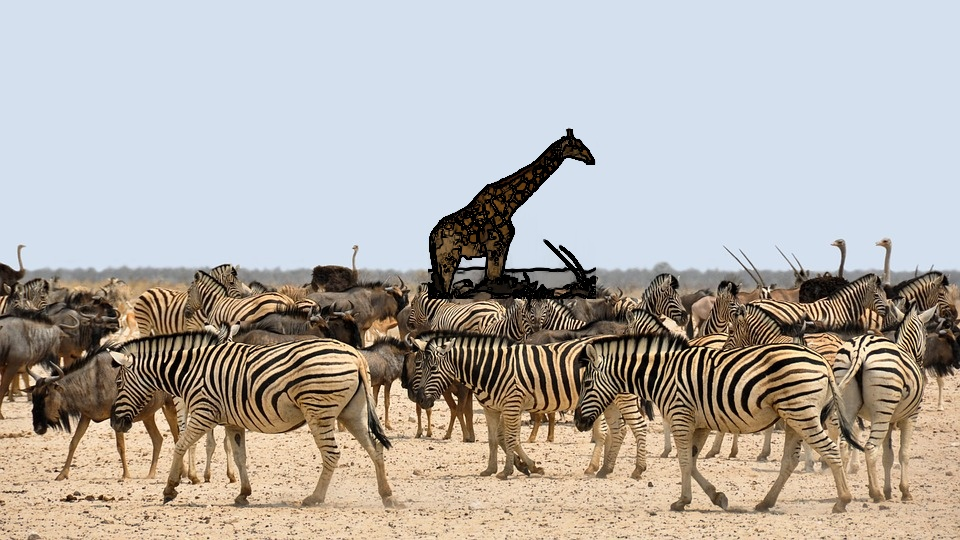

In [7]:
from ikomia.utils import ik
from ikomia.core import task
from ikomia.dataprocess import workflow

# Create your worflow
wf = workflow.create("My first workflow") 

# Add algorithms to your workflow
yolo_id, yolo = wf.add_task(ik.infer_yolo_v5) 
obj_filter_id, obj_filter = wf.add_task(ik.ik_obj_detection_filter) 
stylize_id, stylize = wf.add_task(ik.ocv_stylization) 

# Connect your algorithms
# Auto connection : Ikomia automatically connect input/output tasks
wf.connect_tasks(wf.getRootID(), yolo_id)
wf.connect_tasks(yolo_id, obj_filter_id)
wf.connect_tasks(obj_filter_id, stylize_id)

# But sometimes, you need to do more...

# Manual connection : ik_obj_detection_filter filters graphics objects so it does not output any image.
# That's why you need to connect yourself YOLO output image and Stylization input image.
#
#                       
#     root ---- infer_yolo_v5 -----------------MANUAL CONNECTION----------- ocv_stylization
#                             \                                           /
#                              \                                         /
#                                ------- ik_obj_detection_filter -------

# We connect the first output from infer_yolo_v5 (index = 0) and the first input from ocv_stylization (index = 0).
wf.connect_tasks(yolo_id, stylize_id, [(0, 0)])

# By default, our YOLOv5 algorithm uses the pre-trained yolov5s.pt model.
# So you can filter output objects by class name (COCO class names).
obj_filter_params = {
        ik.ik_obj_detection_filter_param.categories: 'giraffe', # <-- change class name here
        ik.ik_obj_detection_filter_param.confidence: 0.5 # <--- change confidence here
    }
wf.set_parameters(task_id=obj_filter_id, params=obj_filter_params)

# Run
wf.run_on(url="https://cdn.pixabay.com/photo/2016/01/30/17/58/zebra-1170177_960_720.jpg") # <-- change your input image here

# YOLO output image with bounding boxes
img_detect = wf.get_image_with_graphics(yolo_id)
# Stylization output image
img_final = wf.get_image(stylize_id, index=0)

img_detect = cv2.cvtColor(img_detect, cv2.COLOR_RGB2BGR)
img_final = cv2.cvtColor(img_final, cv2.COLOR_RGB2BGR)

imshow(img_detect)
imshow(img_final)

## -Google Colab ONLY- Save your custom image in your Google Drive space

In [ ]:
# Uncomment these lines if you're working on Colab
""" from google.colab import drive
drive.mount('/content/gdrive')

cv2.imwrite("/content/gdrive/MyDrive/img_final.png", img_final) """

## -Google Colab ONLY- Download directly your custom image

In [ ]:
# Uncomment these lines if you're working on Colab
""" from google.colab import files
cv2.imwrite("/content/img_final.png", img_final)
files.download('/content/img_final.png') """